Tiempo x theta
0      0      8
0.1      -7.7095476671866665      7.611323308320333
0.2      -14.66996496396613      6.483163824177325
0.30000000000000004      -20.20501334989417      4.725138857723474
0.4      -23.776946539083507      2.5080596879136117
0.5      -25.03875413871651      0.0473353858425436
0.6000000000000001      -23.867873425101617      -2.4179561031049244
0.7000000000000001      -20.378094185807885      -4.648296186741005
0.8      -14.908500279088102      -6.426996365524091
0.9      -7.990522603685004      -7.581250585103558
1.0      -0.2963047720431824      -7.998923862462812
1.1      7.426601673254389      -7.639446120314477
1.2000000000000002      14.427867554090078      -6.537752901439211
1.3      20.027285279217253      -4.800890187543163
1.4000000000000001      23.680854374234965      -2.5976132804119754
1.5      25.03363278322592      -0.1419903696799243
1.6      23.954219277278536      2.327396119199199
1.7000000000000002      20.54751702454686      4.570629620

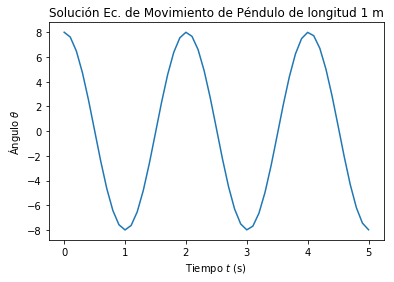

Wall time: 470 ms


In [40]:
#Primera versión, "...como si fuera C/Fortran". 
#Método Runge-Kutta.

import matplotlib.pyplot as plt

#Crear secuencia de subintervalos. (Mesh)
#Límites a,b del intervalo en el tiempo  y número de subintervalos N.
N = 50
a, b = 0, 5

#Distancia h entre cada subintervalo.
h = (b - a)/N

#Parámetro omega.
omega = 3.13

#Valores inciales para velocidad angular y ángulo respectivamente.
alpha = [0, 8]

#Crear conjuntos de tiempo y para guardar soluciones de cada tiempo.
T = [0]*(N + 1)
x = [0]*(N + 1)
theta = [0]*(N + 1)

#Pasar valores iniciales a resultados finales.
x[0] = alpha[0]
theta[0] = alpha[1]

#Completar arreglo de tiempo con la distancia correcta.
for i in range(N + 1):
    T[i] = a + i*h
    
#Inicializar tabla con resultados.
print("Tiempo", "x", "theta", sep=" ")
print(a,alpha[0], alpha[1], sep="      ")

#Comenzar método Runge-Kutta para sistema de dos ecuaciones.
for i in range(1, N + 1):
    
        k11 = h*(-omega**2*theta[i - 1])
        k12 = h*x[i - 1]
        
        k21 = h*(-omega**2*(theta[i - 1] + (1/2)*k12))
        k22 = h*(x[i - 1] + (1/2)*k11)
        
        k31 = h*(-omega**2*(theta[i - 1] + (1/2)*k22))
        k32 = h*(x[i - 1] + (1/2)*k21)
        
        k41 = h*(-omega**2*(theta[i - 1] + k32))
        k42 = h*(x[i - 1] + k31)
        
        x[i] = x[i - 1] + (k11 + 2*k21 + 2*k31 + k41)/6
        theta[i] = theta[i - 1] + (k12 + 2*k22 + 2*k32 + k42)/6
        
        print(T[i], x[i], theta[i], sep="      ")

#Graficar:
plt.plot(T, theta)
plt.title('Solución Ec. de Movimiento de Péndulo de longitud 1 m')
plt.xlabel(r'Tiempo $t$ (s)')
plt.ylabel(r'Ángulo $\theta$')
% time plt.show()


Tiempo x theta
0      0      8
0.1      -7.7095476671866665      7.611323308320333
0.2      -14.66996496396613      6.483163824177325
0.30000000000000004      -20.20501334989417      4.725138857723474
0.4      -23.776946539083507      2.5080596879136117
0.5      -25.03875413871651      0.0473353858425436
0.6000000000000001      -23.867873425101617      -2.4179561031049244
0.7000000000000001      -20.378094185807885      -4.648296186741005
0.8      -14.908500279088102      -6.426996365524091
0.9      -7.990522603685004      -7.581250585103558
1.0      -0.2963047720431824      -7.998923862462812
1.1      7.426601673254389      -7.639446120314477
1.2000000000000002      14.427867554090078      -6.537752901439211
1.3      20.027285279217253      -4.800890187543163
1.4000000000000001      23.680854374234965      -2.5976132804119754
1.5      25.03363278322592      -0.1419903696799243
1.6      23.954219277278536      2.327396119199199
1.7000000000000002      20.54751702454686      4.570629620

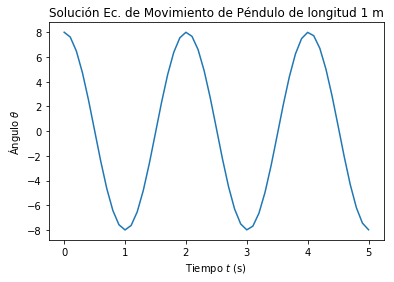

Wall time: 371 ms


In [39]:
#Segunda versión con arreglos y funciones. 
#Método Runge-Kutta.

import matplotlib.pyplot as plt

#Crear secuencia de subintervalos. (Mesh)
#Límites a,b del intervalo en el tiempo  y número de subintervalos N.
N = 50
a, b = 0, 5

#Distancia h entre cada subintervalo.
h = (b - a)/N

#Definir sistema de ecuaciones.
def dx(theta):
    omega = 3.13
    return(-(omega**2)*theta)

def dtheta(x):
    return(x)

#Valores inciales para velocidad angular y ángulo respectivamente.
alpha = [0, 8]

#Definir conjuntos de tiempo y soluciones para cada tiempo.
T =np.zeros(N + 1)
x = np.zeros(N + 1)
theta = np.zeros(N + 1)

#Pasar valores iniciales a resultados finales.
x[0] = alpha[0]
theta[0] = alpha[1]

#Llenar intervalos de tiempo.
for i in range(N + 1):
    T[i] = a + i*h

#Iniciar tabla de resultados.
print("Tiempo", "x", "theta", sep=" ")
print(a,alpha[0], alpha[1], sep="      ")


#Comenzar Runge-Kutta.
for i in range(1, N + 1):
    
        k11 = h*dx(theta[i - 1])
        k12 = h*dtheta(x[i - 1])
        
        k21 = h*dx(theta[i - 1] + (1/2)*k12)
        k22 = h*dtheta(x[i - 1] + (1/2)*k11)
        
        k31 = h*dx(theta[i - 1] + (1/2)*k22)
        k32 = h*dtheta(x[i - 1] + (1/2)*k21)
        
        k41 = h*dx(theta[i - 1] + k32)
        k42 = h*dtheta(x[i - 1] + k31)
        
        x[i] = x[i - 1] + (k11 + 2*k21 + 2*k31 + k41)/6
        theta[i] = theta[i - 1] + (k12 + 2*k22 + 2*k32 + k42)/6
        
        print(T[i], x[i], theta[i], sep="      ")

#Graficar        
plt.plot(T, theta)
plt.title('Solución Ec. de Movimiento de Péndulo de longitud 1 m')
plt.xlabel(r'Tiempo $t$ (s)')
plt.ylabel(r'Ángulo $\theta$')
% time plt.show()

Nota: El parámetro omega fue calculado usando la longitud del péndulo de 1 metro y la aceleración por la gravedad como es usual. Usando arreglos y definiendo funciones para cada ecuación (2da versión) puede notarse una disminución considerable en los tiempos de ejecución dados los mismos parámetros.